# Principal Component Analysis

<p style="font-size:10px">This work is licensed under the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0) license.</p>

Kamila Zdybał, 2020

<p style="font-size:10px">Université libre de Bruxelles, kamila.zdybal@ulb.ac.be</p>
<p style="font-size:10px"><a href="https://kamilazdybal.github.io/science-docs/">Science Docs</a>, kamila.zdybal@gmail.com</p>

***

In this notebook we present the code behind the tutorial that can be accessed [here](https://github.com/kamilazdybal/ulb-atm-phd/blob/master/PCA/PCA.pdf).

▷ We start with performing PCA on a synthetic data set to show all steps graphically.

▷ Then we move on to performing local PCA on portions of the data set identified by K-Means clustering algorithm.

▷ Finally, we present visually the low-dimensional approximation of the original data matrix.

The PCA implementation that we use in this notebook comes from the *sklearn* library: [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

***

## Initial settings

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Styles:
lineColour = '#f44242'
PCColour = '#002f72'
scoresColour = '#ff7d14'
cluster_colors = ['#0e7da7', '#ceca70', '#b45050', '#2d2d54']
newPointColour = '#02111b'
dataPointSize = 5
data_point = 1
new_point = 1
ln = 1
font_title = 18
font_text = 16
font_axis = 16
font_legend = 16
save_plots = False

# Fonts:
csfont = {'fontname':'Charter', 'fontweight':'regular'}
hfont = {'fontname':'Charter', 'fontweight':'bold'}

def axes_in_charter(figureSubplot, font_axis):
    
    for label in (figureSubplot.get_xticklabels()):
        label.set_fontname('Charter')
        label.set_fontweight('regular')
        label.set_fontsize(font_axis)

    for label in (figureSubplot.get_yticklabels()):
        label.set_fontname('Charter')
        label.set_fontweight('regular')
        label.set_fontsize(font_axis)

***

## PCA in steps

Generate a synthetic data set:

In [2]:
Np = 100
q = 1
x = np.linspace(3, 6, Np)
y = 0.8*x + 1*np.random.rand(Np)
Dataset = np.column_stack((x, y))
Dataset_proc = Dataset - np.mean(Dataset, axis=0)

Original data set:

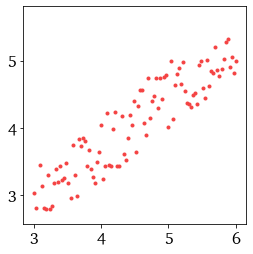

In [3]:
figure1 = plt.figure(figsize=(4, 4))
figureSubplot = plt.subplot(1,1,1)
plt.scatter(Dataset[:,0], Dataset[:,1], color=lineColour, marker='.', linewidth=ln)
plt.axis('equal')
plt.yticks([3, 4, 5, 6]), plt.xticks([3, 4, 5, 6])
axes_in_charter(figureSubplot, font_axis)
if save_plots==True: plt.savefig('plots/python-raw-data.pdf', dpi = 500, bbox_inches='tight')

Original data set, centered:

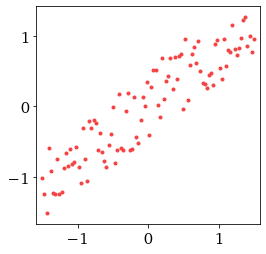

In [4]:
figure2 = plt.figure(figsize=(4, 4))
figureSubplot = plt.subplot(1,1,1)
plt.scatter(Dataset_proc[:,0], Dataset_proc[:,1], color=lineColour, marker='.', linewidth=ln)
plt.axis('equal')
plt.yticks([-1, 0, 1]), plt.xticks([-1, 0, 1])
axes_in_charter(figureSubplot, font_axis)
if save_plots==True: plt.savefig('plots/python-data-centered.pdf', dpi = 500, bbox_inches='tight')

Perform PCA:

In [5]:
pca = PCA()
pca.fit(Dataset)
scores = pca.transform(Dataset)
PCs = pca.components_
eigvals = pca.explained_variance_ratio_

Dataset_projected = np.dot(Dataset_proc, np.transpose(np.mat(PCs[0,:])))
Dataset_approx = np.dot(pca.transform(Dataset)[:,:q], pca.components_[:q,:]) + np.mean(Dataset, axis=0)

Principal Components identified on the original data set:

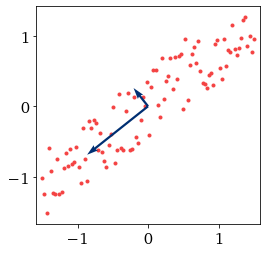

In [6]:
figure3 = plt.figure(figsize=(4, 4))
figureSubplot = plt.subplot(1,1,1)
plt.scatter(Dataset_proc[:,0], Dataset_proc[:,1], color=lineColour, marker='.', linewidth=ln)
plt.quiver(PCs[0,0], PCs[0,1], scale=70*(1-eigvals[0]), color=PCColour, width=0.01)
plt.quiver(PCs[1,0], PCs[1,1], scale=10*(1-eigvals[1]), color=PCColour, width=0.01)
plt.axis('equal')
plt.yticks([-1, 0, 1]), plt.xticks([-1, 0, 1])
axes_in_charter(figureSubplot, font_axis)
if save_plots==True: plt.savefig('plots/python-PCs.pdf', dpi = 500, bbox_inches='tight')

PCA-transformed data set:

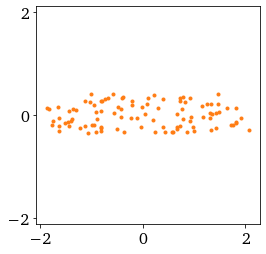

In [7]:
figure4 = plt.figure(figsize=(4, 4))
figureSubplot = plt.subplot(1,1,1)
plt.scatter(scores[:,0], scores[:,1], color=scoresColour, marker='.', linewidth=ln)
plt.axis('equal')
plt.yticks([-2, 0, 2]), plt.xticks([-2, 0, 2])
axes_in_charter(figureSubplot, font_axis)
if save_plots==True: plt.savefig('plots/python-PC-scores.pdf', dpi = 500, bbox_inches='tight')

Projection of the original data set onto the first Principal Component:

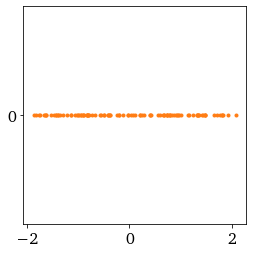

In [8]:
figure5 = plt.figure(figsize=(4, 4))
figureSubplot = plt.subplot(1,1,1)
plt.scatter([Dataset_projected], [np.mat(np.zeros(Np))], color=scoresColour, marker='.', linewidth=ln)
plt.axis('equal')
plt.yticks([0]), plt.xticks([-2, 0, 2])
axes_in_charter(figureSubplot, font_axis)
if save_plots==True: plt.savefig('plots/python-data-projection.pdf', dpi = 500, bbox_inches='tight')

Approximation of the original data set using the first Principal Component:

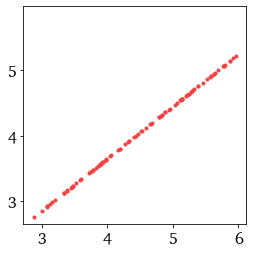

In [9]:
figure6 = plt.figure(figsize=(4, 4))
figureSubplot = plt.subplot(1,1,1)
plt.scatter([Dataset_approx[:,0]], [Dataset_approx[:,1]], color=lineColour, marker='.', linewidth=ln)
plt.axis('equal')
plt.yticks([3, 4, 5, 6]), plt.xticks([3, 4, 5, 6])
axes_in_charter(figureSubplot, font_axis)
if save_plots==True: plt.savefig('plots/python-data-approximation.pdf', dpi = 500, bbox_inches='tight')

Plotting the same figures but on one subplot:

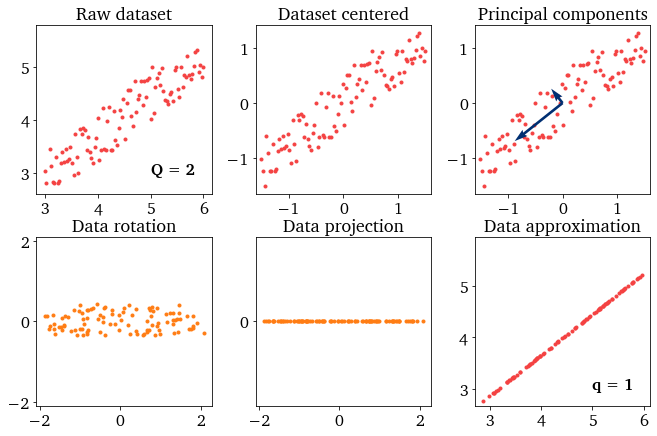

In [10]:
figure = plt.figure(figsize=(11, 7))

figureSubplot = plt.subplot(2,3,1)
plt.scatter(Dataset[:,0], Dataset[:,1], color=lineColour, marker='.', linewidth=ln)
plt.title('Raw dataset', **csfont, fontsize=font_title)
plt.text(5, 3, 'Q = 2', **hfont, fontsize=font_text)
plt.axis('equal')
plt.yticks([3, 4, 5, 6]), plt.xticks([3, 4, 5, 6])
plt.subplots_adjust(wspace=0.25, hspace=0.25)
axes_in_charter(figureSubplot, font_axis)

figureSubplot = plt.subplot(2,3,2)
plt.scatter(Dataset_proc[:,0], Dataset_proc[:,1], color=lineColour, marker='.', linewidth=ln)
plt.title('Dataset centered', **csfont, fontsize=font_title)
plt.axis('equal')
plt.yticks([-1, 0, 1]), plt.xticks([-1, 0, 1])
axes_in_charter(figureSubplot, font_axis)

figureSubplot = plt.subplot(2,3,3)
plt.scatter(Dataset_proc[:,0], Dataset_proc[:,1], color=lineColour, marker='.', linewidth=ln)
plt.quiver(PCs[0,0], PCs[0,1], scale=70*(1-eigvals[0]), color=PCColour, width=0.015)
plt.quiver(PCs[1,0], PCs[1,1], scale=10*(1-eigvals[1]), color=PCColour, width=0.015)
plt.title('Principal components', **csfont, fontsize=font_title)
plt.axis('equal')
plt.yticks([-1, 0, 1]), plt.xticks([-1, 0, 1])
axes_in_charter(figureSubplot, font_axis)

figureSubplot = plt.subplot(2,3,4)
plt.scatter(scores[:,0], scores[:,1], color=scoresColour, marker='.', linewidth=ln)
plt.title('Data rotation', **csfont, fontsize=font_title)
plt.axis('equal')
plt.yticks([-2, 0, 2]), plt.xticks([-2, 0, 2])
axes_in_charter(figureSubplot, font_axis)

figureSubplot = plt.subplot(2,3,5)
plt.scatter([Dataset_projected], [np.mat(np.zeros(Np))], color=scoresColour, marker='.', linewidth=ln)
plt.title('Data projection', **csfont, fontsize=font_title)
plt.axis('equal')
plt.yticks([0]), plt.xticks([-2, 0, 2])
axes_in_charter(figureSubplot, font_axis)

figureSubplot = plt.subplot(2,3,6)
plt.scatter([Dataset_approx[:,0]], [Dataset_approx[:,1]], color=lineColour, marker='.', linewidth=ln)
plt.title('Data approximation', **csfont, fontsize=font_title)
plt.text(5, 3, 'q = 1', **hfont, fontsize=font_text)
plt.axis('equal')
plt.yticks([3, 4, 5, 6]), plt.xticks([3, 4, 5, 6])
axes_in_charter(figureSubplot, font_axis)

if save_plots==True: plt.savefig('plots/PCA-example-subplot.png', dpi = 500, bbox_inches='tight')

***

## Local PCA

We first define a function that will perform PCA on local portions of the data set, defined by the vector `idx`:

In [11]:
def local_pca(X, idx):

    n_k = len(np.unique(idx))

    # Initialize the outputs:
    PCs = []
    eigvals = []
    PC_scores = []

    for k in range(0, n_k):

        # Extract local cluster:
        X_k = X[idx==k]

        # Perform PCA in local cluster:
        pca = PCA()
        pca.fit(X_k)
        PC_scores.append(pca.transform(X_k))
        PCs.append(pca.components_)
        eigvals.append(pca.explained_variance_ratio_)

    return (PCs, eigvals, PC_scores)

### 🛰 Example 1

Generate a synthetic data set that has two distinct clusters:

In [12]:
nPoints = 500
mean1 = [0,1] # data already centered
covariance1 = [[2, 0.5], [0.5, 0.5]]
x1, y1 = np.random.multivariate_normal(mean1, covariance1, nPoints).T

mean2 = [6, 4] # data already centered
covariance2 = [[3, 0.3], [0.3, 0.5]]
x2, y2 = np.random.multivariate_normal(mean2, covariance2, nPoints).T

X = np.column_stack((np.concatenate([x1, x2]), np.concatenate([y1, y2])))

Perform K-Means clustering of the data set:

In [13]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
idx = kmeans.labels_
centroids = kmeans.cluster_centers_

Run local PCA on the data set:

In [14]:
(PCs, eigvals, PC_scores) = local_pca(X, idx)

Visualize the data set with identified eigenvectors:

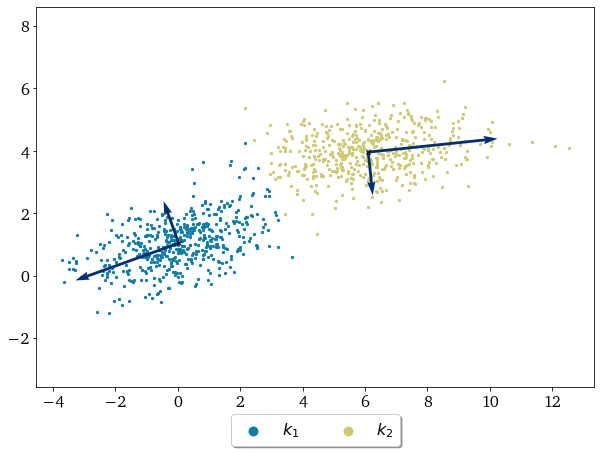

In [15]:
figure = plt.figure(figsize=(10, 7))
figureSubplot = plt.subplot(1,1,1)
plt.scatter(X[idx==0,0], X[idx==0,1], c=cluster_colors[0], s=dataPointSize, marker='o', label='$k_1$')
plt.scatter(X[idx==1,0], X[idx==1,1], c=cluster_colors[1], s=dataPointSize, marker='o', label='$k_2$')
origin = [centroids[0][0]], [centroids[0][1]]
plt.quiver(*origin, PCs[0][0,0], PCs[0][0,1], scale=30*(1-eigvals[0][0]), color=PCColour, width=0.005)
origin = [centroids[0][0]], [centroids[0][1]]
plt.quiver(*origin, PCs[0][1,0], PCs[0][1,1], scale=15*(1-eigvals[0][1]), color=PCColour, width=0.005)
origin = [centroids[1][0]], [centroids[1][1]]
plt.quiver(*origin, PCs[1][0,0], PCs[1][0,1], scale=30*(1-eigvals[1][0]), color=PCColour, width=0.005)
origin = [centroids[1][0]], [centroids[1][1]]
plt.quiver(*origin, PCs[1][1,0], PCs[1][1,1], scale=15*(1-eigvals[1][1]), color=PCColour, width=0.005)
plt.axis('equal')
plt.scatter(centroids[:, 0], centroids[:, 1], color=newPointColour, marker='x', lineWidth=data_point, s=20);
axes_in_charter(figureSubplot, font_axis)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2, fontsize=font_legend, markerscale=4)
if save_plots==True: plt.savefig('plots/lpca-on-cloud-data.png', dpi = 500, bbox_inches='tight')

### 🛰 Example 2

Generate a non-linear synthetic data set:

In [16]:
nPoints = 500
mean1 = [0,1] # data already centered
covariance1 = [[0.4, 0.1], [0.1, 0.1]]
x1, y1 = np.random.multivariate_normal(mean1, covariance1, nPoints).T

x = np.linspace(0,4,nPoints)
y = -(x**2) + 7*x + 4
y = y + y1
x = x + x1

X = np.column_stack((np.concatenate([x]), np.concatenate([y])))

Perform K-Means clustering of the data set:

In [17]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
idx = kmeans.labels_
centroids = kmeans.cluster_centers_

Run local PCA on the data set:

In [18]:
(PCs, eigvals, PC_scores) = local_pca(X, idx)

Visualize the data set with identified eigenvectors:

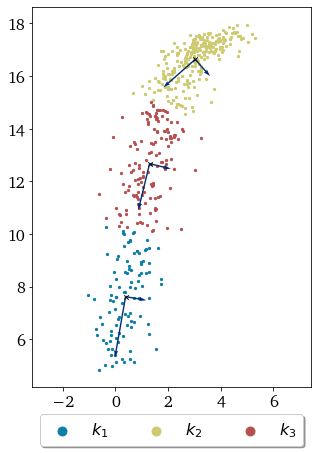

In [19]:
figure = plt.figure(figsize=(5, 7))
figureSubplot = plt.subplot(1,1,1)
plt.axis('equal')
plt.scatter(X[idx==0,0], X[idx==0,1], c=cluster_colors[0], s=dataPointSize, marker='o', label='$k_1$')
plt.scatter(X[idx==1,0], X[idx==1,1], c=cluster_colors[1], s=dataPointSize, marker='o', label='$k_2$')
plt.scatter(X[idx==2,0], X[idx==2,1], c=cluster_colors[2], s=dataPointSize, marker='o', label='$k_3$')
for i in range(0,k):
    origin = [centroids[i][0]], [centroids[i][1]]
    plt.quiver(*origin, PCs[i][0,0], PCs[i][0,1], scale=40*(1-eigvals[i][0]), color=PCColour, width=0.005)
    origin = [centroids[i][0]], [centroids[i][1]]
    plt.quiver(*origin, PCs[i][1,0], PCs[i][1,1], scale=15*(1-eigvals[i][1]), color=PCColour, width=0.005)
plt.scatter(centroids[:, 0], centroids[:, 1], color=newPointColour, marker='x', lineWidth=data_point, s=20);
axes_in_charter(figureSubplot, font_axis)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=3, fontsize=font_legend, markerscale=4)
if save_plots==True: plt.savefig('plots/lpca-on-nonlinear-data.png.png', dpi = 500, bbox_inches='tight')

***

## Low-rank approximation

In this example we perform low-rank approximation of a random, semi-structured and structured data sets. The original dimensionality of the data set is 6.

You can set the boolean below to `True` if you want the numerical values to show up on the imshow plot:

In [20]:
annotate_bool = True

### Generate a random synthetic data set:

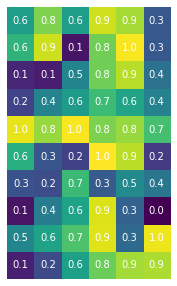

In [21]:
Dataset_random = np.random.rand(10,6)
Dataset_random = Dataset_random/np.max(Dataset_random)
mu = np.mean(Dataset_random, axis=0)

# Perform PCA:
pca = PCA()
pca.fit(Dataset_random)
scores = pca.transform(Dataset_random)
PCs = pca.components_
eigvals_random = pca.explained_variance_ratio_

# Display original matrix:
figure = plt.figure(figsize=(4, 5))
figureSubplot = figure.add_subplot(1,1,1)
plt.imshow(Dataset_random, vmin=0, vmax=1)
plt.yticks([]), plt.xticks([])
figureSubplot.spines["top"].set_visible(False)
figureSubplot.spines["bottom"].set_visible(False)
figureSubplot.spines["right"].set_visible(False)
figureSubplot.spines["left"].set_visible(False)

# Annotate the imshow:
if annotate_bool == True:
    for i in range(10):
        for j in range(6):
            text = plt.text(j, i, round(Dataset_random[i, j], 1),
                           ha="center", va="center", color="w")

if save_plots==True: plt.savefig('plots/random-matrix-original.png', dpi = 500, bbox_inches='tight')

Perform low-rank approximation of the random data set with `Nq` number of first Principal Components:

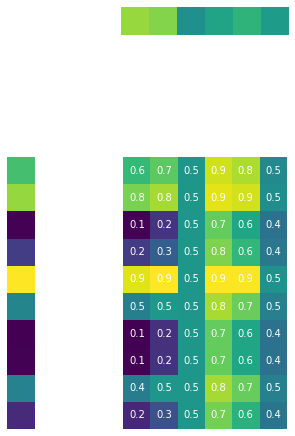

In [22]:
Nq = 1

Dataset_approx = np.dot(pca.transform(Dataset_random)[:,:Nq], pca.components_[:Nq,:])
Dataset_approx += mu

figure = plt.figure(figsize=(6.3, 10))

figureSubplot = plt.subplot(2,2,2)
plt.imshow(pca.components_[:Nq,:], vmin=-1, vmax=1)
plt.yticks([]), plt.xticks([])
figureSubplot.spines["top"].set_visible(False)
figureSubplot.spines["bottom"].set_visible(False)
figureSubplot.spines["right"].set_visible(False)
figureSubplot.spines["left"].set_visible(False)

figureSubplot = plt.subplot(2,2,3)
plt.imshow(pca.transform(Dataset_random)[:,:Nq])
plt.yticks([]), plt.xticks([])
figureSubplot.spines["top"].set_visible(False)
figureSubplot.spines["bottom"].set_visible(False)
figureSubplot.spines["right"].set_visible(False)
figureSubplot.spines["left"].set_visible(False)

figureSubplot = plt.subplot(2,2,4)
plt.imshow(Dataset_approx)
plt.yticks([]), plt.xticks([])
figureSubplot.spines["top"].set_visible(False)
figureSubplot.spines["bottom"].set_visible(False)
figureSubplot.spines["right"].set_visible(False)
figureSubplot.spines["left"].set_visible(False)
plt.subplots_adjust(wspace=0.1, hspace=0)

# Annotate the imshow:
if annotate_bool == True:
    for i in range(10):
        for j in range(6):
            text = plt.text(j, i, round(Dataset_approx[i, j], 1),
                           ha="center", va="center", color="w")

if save_plots==True: plt.savefig('plots/random-matrix-reconstruction-PCs-' + str(Nq) + '.png', dpi = 500, bbox_inches='tight')

### Generate a semi-structured synthetic data set:

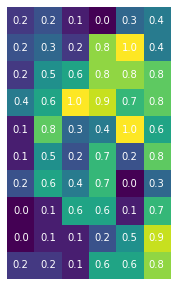

In [23]:
Dataset_semi_structured = np.array([[2, 3, 1, 0, 4, 5],
                    [3, 4, 2, 10, 12, 5],
                    [2, 6, 7, 10, 10, 9],
                    [5, 7, 12, 11, 8, 9],
                    [1, 9, 4, 5, 12, 7],
                    [1, 6, 3, 8, 3, 9],
                    [3, 7, 5, 8, 0, 4],
                    [0, 1, 7, 7, 1, 8],
                    [0, 1, 1, 3, 6, 11],
                    [2, 2, 1, 7, 7, 10]])

Dataset_semi_structured = Dataset_semi_structured/np.max(Dataset_semi_structured)
mu = np.mean(Dataset_semi_structured, axis=0)

# Perform PCA:
pca = PCA()
pca.fit(Dataset_semi_structured)
scores = pca.transform(Dataset_semi_structured)
PCs = pca.components_
eigvals_semi_structured = pca.explained_variance_ratio_

# Display matrix:
figure = plt.figure(figsize=(4, 5))
figureSubplot = plt.subplot(1,1,1)
plt.imshow(Dataset_semi_structured, vmin=0, vmax=1)
plt.yticks([]), plt.xticks([])
#plt.colorbar()
figureSubplot.spines["top"].set_visible(False)
figureSubplot.spines["bottom"].set_visible(False)
figureSubplot.spines["right"].set_visible(False)
figureSubplot.spines["left"].set_visible(False)

# Annotate the imshow:
if annotate_bool == True:
    for i in range(10):
        for j in range(6):
            text = plt.text(j, i, round(Dataset_semi_structured[i, j], 1),
                           ha="center", va="center", color="w")

if save_plots==True: plt.savefig('plots/semi-structured-matrix-original.png', dpi = 500, bbox_inches='tight')

Perform low-rank approximation of the semi-structured data set with `Nq` number of first Principal Components:

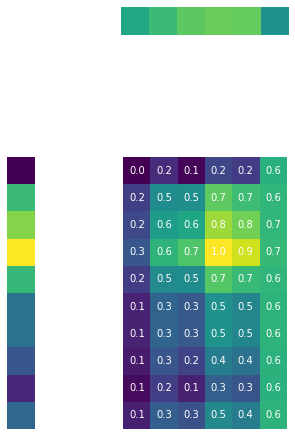

In [24]:
Nq = 1

Dataset_approx = np.dot(pca.transform(Dataset_semi_structured)[:,:Nq], pca.components_[:Nq,:])
Dataset_approx += mu

figure = plt.figure(figsize=(6.3, 10))

figureSubplot = plt.subplot(2,2,2)
plt.imshow(pca.components_[:Nq,:], vmin=-1, vmax=1)
plt.yticks([]), plt.xticks([])
figureSubplot.spines["top"].set_visible(False)
figureSubplot.spines["bottom"].set_visible(False)
figureSubplot.spines["right"].set_visible(False)
figureSubplot.spines["left"].set_visible(False)

figureSubplot = plt.subplot(2,2,3)
plt.imshow(pca.transform(Dataset_semi_structured)[:,:Nq])
plt.yticks([]), plt.xticks([])
figureSubplot.spines["top"].set_visible(False)
figureSubplot.spines["bottom"].set_visible(False)
figureSubplot.spines["right"].set_visible(False)
figureSubplot.spines["left"].set_visible(False)

figureSubplot = plt.subplot(2,2,4)
plt.imshow(Dataset_approx)
plt.yticks([]), plt.xticks([])
figureSubplot.spines["top"].set_visible(False)
figureSubplot.spines["bottom"].set_visible(False)
figureSubplot.spines["right"].set_visible(False)
figureSubplot.spines["left"].set_visible(False)
plt.subplots_adjust(wspace=0.1, hspace=0)

# Annotate the imshow:
if annotate_bool == True:
    for i in range(10):
        for j in range(6):
            text = plt.text(j, i, round(Dataset_approx[i, j], 1),
                           ha="center", va="center", color="w")

if save_plots==True: plt.savefig('plots/semi-structured-matrix-reconstruction-PCs-' + str(Nq) + '.png', dpi = 500, bbox_inches='tight')

### Generate a structured synthetic data set:

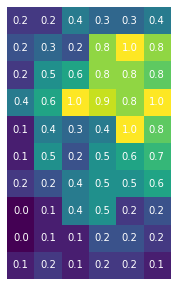

In [25]:
Dataset_structured = np.array([[2, 2, 5, 4, 4, 5],
                    [3, 4, 3, 10, 12, 10],
                    [2, 6, 7, 10, 10, 9],
                    [5, 7, 12, 11, 10, 12],
                    [1, 5, 4, 5, 12, 9],
                    [1, 6, 3, 6, 7, 8],
                    [2, 3, 5, 6, 6, 7],
                    [0, 1, 5, 6, 2, 3],
                    [0, 1, 1, 3, 3, 2],
                    [1, 2, 1, 2, 2, 1]])

Dataset_structured = Dataset_structured/np.max(Dataset_structured)
mu = np.mean(Dataset_structured, axis=0)
# Perform PCA
pca = PCA()
pca.fit(Dataset_structured)
scores = pca.transform(Dataset_structured)
PCs = pca.components_
eigvals_structured = pca.explained_variance_ratio_

# Display matrix:
figure = plt.figure(figsize=(4, 5))
figureSubplot = plt.subplot(1,1,1)
plt.imshow(Dataset_structured, vmin=0, vmax=1)
plt.yticks([]), plt.xticks([])
#plt.colorbar()
figureSubplot.spines["top"].set_visible(False)
figureSubplot.spines["bottom"].set_visible(False)
figureSubplot.spines["right"].set_visible(False)
figureSubplot.spines["left"].set_visible(False)

# Annotate the imshow:
if annotate_bool == True:
    for i in range(10):
        for j in range(6):
            text = plt.text(j, i, round(Dataset_structured[i, j], 1),
                           ha="center", va="center", color="w")
            
if save_plots==True: plt.savefig('plots/structured-matrix-original.png', dpi = 500, bbox_inches='tight')

Perform low-rank approximation of the structured data set with `Nq` number of first Principal Components:

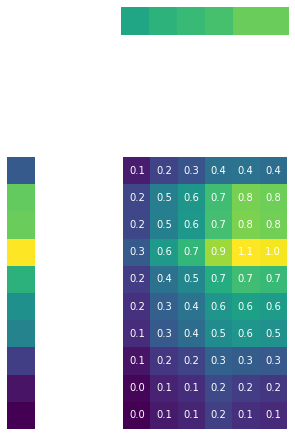

In [26]:
Nq = 1

Dataset_approx = np.dot(pca.transform(Dataset_structured)[:,:Nq], pca.components_[:Nq,:])
Dataset_approx += mu

figure = plt.figure(figsize=(6.3, 10))

figureSubplot = plt.subplot(2,2,2)
plt.imshow(pca.components_[:Nq,:], vmin=-1, vmax=1)
plt.yticks([]), plt.xticks([])
figureSubplot.spines["top"].set_visible(False)
figureSubplot.spines["bottom"].set_visible(False)
figureSubplot.spines["right"].set_visible(False)
figureSubplot.spines["left"].set_visible(False)

figureSubplot = plt.subplot(2,2,3)
plt.imshow(pca.transform(Dataset_structured)[:,:Nq])
plt.yticks([]), plt.xticks([])
figureSubplot.spines["top"].set_visible(False)
figureSubplot.spines["bottom"].set_visible(False)
figureSubplot.spines["right"].set_visible(False)
figureSubplot.spines["left"].set_visible(False)

figureSubplot = plt.subplot(2,2,4)
art = plt.imshow(Dataset_approx)
plt.yticks([]), plt.xticks([])
figureSubplot.spines["top"].set_visible(False)
figureSubplot.spines["bottom"].set_visible(False)
figureSubplot.spines["right"].set_visible(False)
figureSubplot.spines["left"].set_visible(False)
plt.subplots_adjust(wspace=0.1, hspace=0)

# Annotate the imshow:
if annotate_bool == True:
    for i in range(10):
        for j in range(6):
            text = plt.text(j, i, round(Dataset_approx[i, j], 1),
                           ha="center", va="center", color="w")

if save_plots==True: plt.savefig('plots/structured-matrix-reconstruction-PCs-' + str(Nq) + '.png', dpi = 500, bbox_inches='tight')

***